In [0]:
%cd '/content/drive/My Drive/Colab Notebooks/kaggle'

/content/drive/My Drive/Colab Notebooks/kaggle


In [0]:
!pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 38kB/s 
     |████████████████████████████████| 3.9MB 54.5MB/s 
     |████████████████████████████████| 450kB 51.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=50bd51bd8768f57d0bb874b74a0b5ab4c7619b5003799ae1dffc8fd151eac3be
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc

In [0]:
#tensorflow.__version__

NameError: ignored

In [0]:
!pip install keras==2.3.1

     |████████████████████████████████| 378kB 4.9MB/s 
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5


In [0]:
%cd '/content/drive/My Drive/Colab Notebooks/kaggle/'
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

/content/drive/My Drive/Colab Notebooks/kaggle
kaggle.json


In [0]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!kaggle -v

Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
     |████████████████████████████████| 1.4MB 4.8MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 58 kB 2.6 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72859 sha256=3910458253fe3848727e5f6f827d2a30b9aba2b0ae52f72048c16223e98b66e5
  Stored in directory: /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01
Successfully built kaggle
Kaggle API 1.5.6


In [0]:
%cd '/content/drive/My Drive/Colab Notebooks/kaggle/covid19_3'
!kaggle competitions download -c covid19-global-forecasting-week-3

/content/drive/My Drive/Colab Notebooks/kaggle/covid19_3
  0% 0.00/236k [00:00<?, ?B/s]
100% 236k/236k [00:00<00:00, 25.1MB/s]


In [0]:
!unzip '/content/drive/My Drive/Colab Notebooks/kaggle/covid19_3/covid19-global-forecasting-week-3.zip'

Archive:  /content/drive/My Drive/Colab Notebooks/kaggle/covid19_3/covid19-global-forecasting-week-3.zip
  inflating: submission.csv          
  inflating: test.csv                
  inflating: train.csv               


In [0]:
#!pip install geopandas

In [0]:
import numpy as np
import pandas as pd
import os
import time
import multiprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import tensorflow as tf
import keras
import keras.backend as K

from pathlib import Path
from tqdm import tqdm
from datetime import datetime,timedelta

from keras.models import Sequential
from keras.layers import Dense, LSTM, RNN, Dropout, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
from keras import optimizers
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#import geopandas as gpd
#from shapely.geometry import Point
#from sklearn.utils import shuffle

print(tf.__version__,keras.__version__)
for dirname, _, filenames in os.walk('/content/drive/My Drive/Colab Notebooks/kaggle/covid19_3/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

mem_bytes = os.sysconf('SC_PAGE_SIZE') * os.sysconf('SC_PHYS_PAGES')  # e.g. 4015976448
mem_gib = mem_bytes/(1024.**3)  # e.g. 3.74
print("RAM: %f GB" % mem_gib)
print("CORES: %d" % multiprocessing.cpu_count())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


2.1.0 2.3.1
/content/drive/My Drive/Colab Notebooks/kaggle/covid19_3/covid19-global-forecasting-week-3.zip
/content/drive/My Drive/Colab Notebooks/kaggle/covid19_3/submission.csv
/content/drive/My Drive/Colab Notebooks/kaggle/covid19_3/test.csv
/content/drive/My Drive/Colab Notebooks/kaggle/covid19_3/train.csv
RAM: 12.715855 GB
CORES: 2


In [0]:
%cd '/content/drive/My Drive/Colab Notebooks/kaggle/covid19_3/'

/content/drive/My Drive/Colab Notebooks/kaggle/covid19


In [0]:
train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/kaggle/covid19_3/train.csv")
test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/kaggle/covid19_3/test.csv")
train.tail()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
23251,32707,NaN,Zimbabwe,2020-04-02,9.0,1.0
23252,32708,NaN,Zimbabwe,2020-04-03,9.0,1.0
23253,32709,NaN,Zimbabwe,2020-04-04,9.0,1.0
23254,32710,NaN,Zimbabwe,2020-04-05,9.0,1.0
23255,32711,NaN,Zimbabwe,2020-04-06,10.0,1.0


In [0]:
#train.head()
test.tail()

,ForecastId,Province_State,Country_Region,Date
13153,13154,NaN,Zimbabwe,2020-05-03
13154,13155,NaN,Zimbabwe,2020-05-04
13155,13156,NaN,Zimbabwe,2020-05-05
13156,13157,NaN,Zimbabwe,2020-05-06
13157,13158,NaN,Zimbabwe,2020-05-07


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23256 entries, 0 to 23255
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              23256 non-null  int64  
 1   Province_State  9880 non-null   object 
 2   Country_Region  23256 non-null  object 
 3   Date            23256 non-null  object 
 4   ConfirmedCases  23256 non-null  float64
 5   Fatalities      23256 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.1+ MB


In [0]:
mask = train['Date'].max()  # string dates, can be compared
world_cum_confirmed = train[train['Date'] == mask].ConfirmedCases.sum()
world_cum_fatal =   train[train['Date'] == mask].Fatalities.sum()
#world_cum_fatal = sum(train[train['Date'] == mask].Fatalities)


In [0]:
print('Number of Countires: ', len(train['Country_Region'].unique()))
print('Training dataset ends at: ', mask)
print('Number of cumulative confirmed cases worldwide are: ', world_cum_confirmed)
print('Number of cumulative fatal cases worldwide are: ', world_cum_fatal)

Number of Countires:  180
Training dataset ends at:  2020-04-06
Number of cumulative confirmed cases worldwide are:  1344856.0
Number of cumulative fatal cases worldwide are:  74560.0


In [0]:
# top 10 countires that have most servere situation
cum_per_country = train[ train['Date'] == mask].groupby(['Date','Country_Region']).sum().sort_values(['ConfirmedCases'], ascending=False)
cum_per_country[:10]

Id  ConfirmedCases  Fatalities
Date       Country_Region                                     
2020-04-06 US              1497717        366454.0     10779.0
           Spain             23295        136675.0     13341.0
           Italy             15591        132547.0     16523.0
           Germany           13558        103374.0      1810.0
           France           126485         98962.0      8926.0
           China            249678         82665.0      3335.0
           Iran              15163         60500.0      3739.0
           United Kingdom   314805         52277.0      5385.0
           Turkey            24793         30217.0       649.0
           Switzerland       23830         21657.0       765.0

In [0]:
# plot growing curve(by date) for top 5 most servere countries except China
# TODO: optimize code

date = train['Date'].unique()
# cc_us = train[train['Country_Region'] == 'US'].groupby(['Date']).sum().ConfirmedCases
# ft_us = train[train['Country_Region'] == 'US'].groupby(['Date']).sum().Fatalities
# cc_ity = train[train['Country_Region'] == 'Italy'].groupby(['Date']).sum().ConfirmedCases
# ft_ity = train[train['Country_Region'] == 'Italy'].groupby(['Date']).sum().Fatalities
# cc_spn = train[train['Country_Region'] == 'Spain'].groupby(['Date']).sum().ConfirmedCases
# ft_spn = train[train['Country_Region'] == 'Spain'].groupby(['Date']).sum().Fatalities
# cc_gmn = train[train['Country_Region'] == 'Germany'].groupby(['Date']).sum().ConfirmedCases
# ft_gmn = train[train['Country_Region'] == 'Germany'].groupby(['Date']).sum().Fatalities
# cc_frc = train[train['Country_Region'] == 'France'].groupby(['Date']).sum().ConfirmedCases
# ft_frc = train[train['Country_Region'] == 'France'].groupby(['Date']).sum().Fatalities

growdict = {}
cum_per_country = train[ train['Date'] == mask].groupby(['Country_Region']).sum().sort_values(['ConfirmedCases'], ascending=False)
for ctry in cum_per_country.index[:6]:   # here index is 'coutry_region', 'date' is gone 
  growdict['cc_{}'.format(ctry)] = train[train['Country_Region']==ctry].groupby('Date').sum().ConfirmedCases
  growdict['ft_{}'.format(ctry)] = train[train['Country_Region']==ctry].groupby('Date').sum().Fatalities

fig = go.Figure()
# add traces
# fig.add_trace(go.Scatter(x=date, y=cc_us, name='US'))
# fig.add_trace(go.Scatter(x=date, y=cc_ity, name='Italy'))
# fig.add_trace(go.Scatter(x=date, y=cc_spn, name='Spain'))
# fig.add_trace(go.Scatter(x=date, y=cc_gmn, name='Germany'))
# fig.add_trace(go.Scatter(x=date, y=cc_frc, name='France'))
for ctry in cum_per_country.index[:6]: 
  fig.add_trace(go.Scatter(x=date, y=growdict['cc_{}'.format(ctry)], name =ctry) )

fig.update_layout(title="Plot of Cumulative Cases for Top 5 countires (except China)",
         xaxis_title="Date",
         yaxis_title="Cases")
fig.update_xaxes(nticks=30)

fig.show()

In [0]:
# simple visualization with DF plot
dd = train[train['Country_Region'].isin(["US",'Italy'])].groupby(['Country_Region','Date',]).sum().ConfirmedCases
dd.plot()

In [0]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
#print_full(ff.Date.unique()[::4])
#print_full(ff[:100])
print_full( ff.Date[:len(ff.Date.unique())][::4].values )

['2020-01-22' '2020-01-26' '2020-01-30' '2020-02-03' '2020-02-07'
 '2020-02-11' '2020-02-15' '2020-02-19' '2020-02-23' '2020-02-27'
 '2020-03-02' '2020-03-06' '2020-03-10' '2020-03-14' '2020-03-18'
 '2020-03-22' '2020-03-26' '2020-03-30' '2020-04-03']


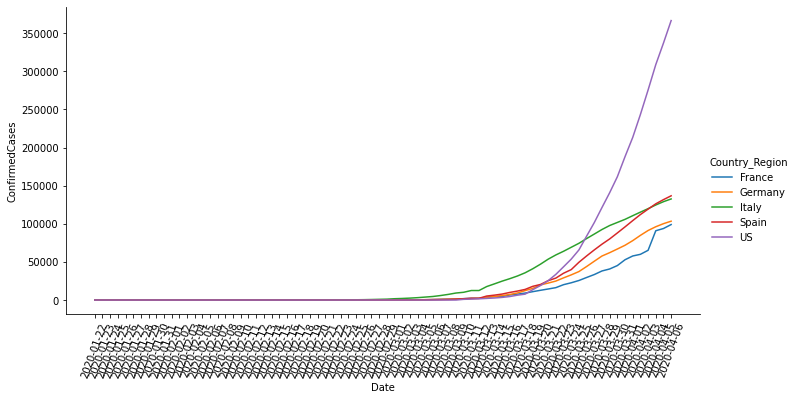

In [0]:
# Simple visualization with sns
ee =train[train['Country_Region'].isin(["US",'Italy','Spain','Germany','France'])].groupby(['Country_Region','Date',]).sum()
ff = ee.reset_index(level=['Country_Region','Date'])
g = sns.FacetGrid(ff, hue="Country_Region", height=5, aspect=2,)
g.map(plt.plot,  'Date' ,'ConfirmedCases')
g.set_xticklabels(rotation =70)
g.add_legend()

#g.set( xticks = np.arange(10) )  #ff.Date[:len(ff.Date.unique())][::4] 

#sns.lineplot(x = 'Date', y = 'ConfirmedCases', hue = 'Country_Region',data =ff)

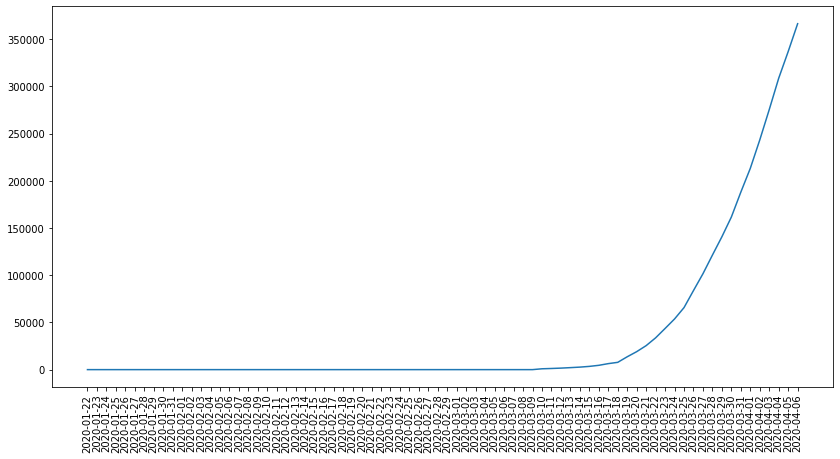

In [0]:
# visulization with matplotlib
fig = plt.subplots(figsize = (14,7))
plt.plot(date, growdict['cc_US'])
plt.xticks(rotation='vertical')
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'
plt.show()

In [0]:
#TODO: check duplicates,missing numeric, string, typo.

In [0]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])
train['Country_Region'] = train['Country_Region'].astype(str)
# train['Province_State'] = train['Province_State'].astype(str)
test['Country_Region'] = test['Country_Region'].astype(str)
# test['Province_State'] = test['Province_State'].astype(str)

In [0]:
EMPTY_VAL = "EMPTY_VAL"

def fillState(state, country):
    if state == EMPTY_VAL: return country
    return state

train['Province_State'].fillna(EMPTY_VAL, inplace=True)
train['Province_State'] = train.loc[:, ['Province_State', 'Country_Region']].apply(lambda x : fillState(x['Province_State'], x['Country_Region']), axis=1)

test['Province_State'].fillna(EMPTY_VAL, inplace=True)
test['Province_State'] = test.loc[:, ['Province_State', 'Country_Region']].apply(lambda x : fillState(x['Province_State'], x['Country_Region']), axis=1)

In [0]:
le = preprocessing.LabelEncoder()
train['country_encoder'] = le.fit_transform(train['Country_Region'])
train['date_int'] = train['Date'].apply(lambda x: datetime.strftime(x, '%m%d')).astype(int)

test['country_encoder'] = le.transform(test['Country_Region'])
test['date_int'] = test['Date'].apply(lambda x: datetime.strftime(x, '%m%d')).astype(int)


In [0]:
train['province_encoder'] = le.fit_transform(train['Province_State'])
test['province_encoder'] = le.transform(test['Province_State'])

In [0]:
# #TODO: create data_generate func
start_time = time.time()
country = train['Country_Region'].drop_duplicates()
train_df = train.copy()
train_df.rename(columns={'Date': 'date', 'ConfirmedCases': 'cc_cases', 'Fatalities': 'ft_cases', 'Country_Region': 'country', 'Province_State': 'province'}, inplace=True)
lags = np.arange(1,8,1)  # lag of 1 to 7

with tqdm(total = len(list(train_df['date'].unique()))) as pbar:
    for d in train_df['date'].drop_duplicates():
        for i in country:
            province = train_df[train_df['country'] == i]['province'].drop_duplicates()
            for j in province:
                mask = (train_df['date'] == d) & (train_df['country'] == i) & (train_df['province'] == j)            
                for lag in lags:
                    mask_org = (train_df['date'] == (d - pd.Timedelta(days=lag))) & (train_df['country'] == i) & (train_df['province'] == j)
                    try:
                        train_df.loc[mask, 'cc_cases_' + str(lag)] = train_df.loc[mask_org, 'cc_cases'].values
                    except:
                        train_df.loc[mask, 'cc_cases_' + str(lag)] = 0

                    try:
                        train_df.loc[mask, 'ft_cases_' + str(lag)] = train_df.loc[mask_org, 'ft_cases'].values
                    except:
                        train_df.loc[mask, 'ft_cases_' + str(lag)] = 0
        pbar.update(1)
print('Time spent for building features is {} minutes'.format(round((time.time()-start_time)/60,1)))

100%|██████████| 76/76 [17:42<00:00, 13.98s/it]

Time spent for building features is 17.7 minutes


In [0]:
train_df.to_csv(Path('/content/drive/My Drive/Colab Notebooks/kaggle/covid19_3/', 'train_df.csv'))

# saved locally, later reload it 

In [0]:
train_df = pd.read_csv(Path('/content/drive/My Drive/Colab Notebooks/kaggle/covid19_3/', 'train_df.csv'), index_col = 0, parse_dates = ['date'])
train_df = train_df[train_df['date_int']>=301]  # cut off data after 301 to avoid most majority zeros
train_df['weekday'] = train_df['date'].dt.weekday
train_df[train_df['country'] == 'Italy'].tail(10)

,Id,province,country,date,cc_cases,ft_cases,country_encoder,date_int,province_encoder,cc_cases_1,ft_cases_1,cc_cases_2,ft_cases_2,cc_cases_3,ft_cases_3,cc_cases_4,ft_cases_4,cc_cases_5,ft_cases_5,cc_cases_6,ft_cases_6,cc_cases_7,ft_cases_7,weekday
11086,15582,Italy,Italy,2020-03-28,92472.0,10023.0,84,328,130,86498.0,9134.0,80589.0,8215.0,74386.0,7503.0,69176.0,6820.0,63927.0,6077.0,59138.0,5476.0,53578.0,4825.0,5
11087,15583,Italy,Italy,2020-03-29,97689.0,10779.0,84,329,130,92472.0,10023.0,86498.0,9134.0,80589.0,8215.0,74386.0,7503.0,69176.0,6820.0,63927.0,6077.0,59138.0,5476.0,6
11088,15584,Italy,Italy,2020-03-30,101739.0,11591.0,84,330,130,97689.0,10779.0,92472.0,10023.0,86498.0,9134.0,80589.0,8215.0,74386.0,7503.0,69176.0,6820.0,63927.0,6077.0,0
11089,15585,Italy,Italy,2020-03-31,105792.0,12428.0,84,331,130,101739.0,11591.0,97689.0,10779.0,92472.0,10023.0,86498.0,9134.0,80589.0,8215.0,74386.0,7503.0,69176.0,6820.0,1
11090,15586,Italy,Italy,2020-04-01,110574.0,13155.0,84,401,130,105792.0,12428.0,101739.0,11591.0,97689.0,10779.0,92472.0,10023.0,86498.0,9134.0,80589.0,8215.0,74386.0,7503.0,2
11091,15587,Italy,Italy,2020-04-02,115242.0,13915.0,84,402,130,110574.0,13155.0,105792.0,12428.0,101739.0,11591.0,97689.0,10779.0,92472.0,10023.0,86498.0,9134.0,80589.0,8215.0,3
11092,15588,Italy,Italy,2020-04-03,119827.0,14681.0,84,403,130,115242.0,13915.0,110574.0,13155.0,105792.0,12428.0,101739.0,11591.0,97689.0,10779.0,92472.0,10023.0,86498.0,9134.0,4
11093,15589,Italy,Italy,2020-04-04,124632.0,15362.0,84,404,130,119827.0,14681.0,115242.0,13915.0,110574.0,13155.0,105792.0,12428.0,101739.0,11591.0,97689.0,10779.0,92472.0,10023.0,5
11094,15590,Italy,Italy,2020-04-05,128948.0,15887.0,84,405,130,124632.0,15362.0,119827.0,14681.0,115242.0,13915.0,110574.0,13155.0,105792.0,12428.0,101739.0,11591.0,97689.0,10779.0,6
11095,15591,Italy,Italy,2020-04-06,132547.0,16523.0,84,406,130,128948.0,15887.0,124632.0,15362.0,119827.0,14681.0,115242.0,13915.0,110574.0,13155.0,105792.0,12428.0,101739.0,11591.0,0


# LSTM model

In [0]:
#TODO: walk forward validation
def split_train_val(df, val_ratio):
    val_len = int(len(df) * val_ratio)
    train_set =  df[:-val_len]
    val_set = df[-val_len:]
    return train_set, val_set

In [0]:
test_fixed_cols = ['ForecastId', 'Province_State', 'Country_Region', 'Date']
fixed_cols = ['Id', 'province', 'country', 'date']
output_cols = ['cc_cases', 'ft_cases']
input_cols = list(set(train_df.columns.to_list()) - set(fixed_cols) - set(output_cols))
print('output columns are ', output_cols)
print('input columns are ', input_cols)
X = train_df[input_cols]
y = train_df[output_cols]

output columns are  ['cc_cases', 'ft_cases']
input columns are  ['ft_cases_5', 'cc_cases_4', 'ft_cases_6', 'cc_cases_5', 'cc_cases_7', 'cc_cases_3', 'weekday', 'province_encoder', 'date_int', 'ft_cases_2', 'ft_cases_1', 'cc_cases_1', 'country_encoder', 'ft_cases_4', 'ft_cases_7', 'ft_cases_3', 'cc_cases_6', 'cc_cases_2']


In [0]:
# split to cumulative and fatal features and build 2 separate models
# split to train and validation set
cc_input = ['country_encoder', 'province_encoder', 'weekday', 'date_int','cc_cases_1', 'cc_cases_2', 'cc_cases_3', 'cc_cases_4', 'cc_cases_5', 'cc_cases_6', 'cc_cases_7'] # 'cc_cases_1', cc_cases_2', 'cc_cases_3', 'cc_cases_4', 'cc_cases_5', 'cc_cases_6', 'cc_cases_7', 'country_encoder', 'province_encoder', 'weekday' 
ft_input = ['country_encoder', 'province_encoder', 'weekday' , 'date_int', 'ft_cases_1', 'ft_cases_2', 'ft_cases_3', 'ft_cases_4', 'ft_cases_5', 'ft_cases_6', 'ft_cases_7'] #['ft_cases_1', 'ft_cases_2', 'ft_cases_3', 'ft_cases_4', 'ft_cases_5', 'ft_cases_6', 'ft_cases_7', 'country_encoder', 'province_encoder', 'weekday' 
cc_output = ['cc_cases']
ft_output = ['ft_cases']
val_ratio = 0.05
X_cc = X[cc_input]
X_ft = X[ft_input]
y_cc = y[cc_output]
y_ft = y[ft_output]
train_X_cc, val_X_cc = split_train_val(df = X_cc, val_ratio = val_ratio)
train_y_cc, val_y_cc = split_train_val(df = y_cc, val_ratio = val_ratio)
train_X_ft, val_X_ft = split_train_val(df = X_ft, val_ratio = val_ratio)
train_y_ft, val_y_ft = split_train_val(df = y_ft, val_ratio = val_ratio)

In [0]:
idx = np.random.RandomState(seed=123).permutation(train_X_cc.index) 
train_X_cc = train_X_cc.reindex(idx) 
train_y_cc = train_y_cc.reindex(idx) 
train_X_ft = train_X_ft.reindex(idx) 
train_y_ft = train_y_ft.reindex(idx) # train_y_cc.tail()

In [0]:
# normalization
normalize = False

if normalize ==True:
  
  X_scaler_cc = MinMaxScaler()
  X_train_cc = X_scaler_cc.fit_transform(train_X_cc)
  X_val_cc =  X_scaler_cc.transform(val_X_cc) # intput/output 2D array-like

  y_scaler_cc = MinMaxScaler()
  y_train_cc = y_scaler_cc.fit_transform(train_y_cc)
  y_val_cc = y_scaler_cc.transform(val_y_cc) # array-like

  X_scaler_ft = MinMaxScaler()
  X_train_ft = X_scaler_ft.fit_transform(train_X_ft)
  X_val_ft =  X_scaler_ft.transform(val_X_ft) # intput/output 2D array-like

  y_scaler_ft = MinMaxScaler()
  y_train_ft = y_scaler_ft.fit_transform(train_y_ft)
  y_val_ft = y_scaler_ft.transform(val_y_ft) # array-like

else:
  # if choose to not apply normalization, however it generates NaN in output...
  X_train_cc = train_X_cc.to_numpy()  
  X_val_cc = val_X_cc.to_numpy()
  X_train_ft = train_X_ft.to_numpy()
  X_val_ft = val_X_ft.to_numpy()

  y_train_cc = train_y_cc.to_numpy()
  y_val_cc = val_y_cc.to_numpy()
  y_train_ft = train_y_ft.to_numpy()
  y_val_ft = val_y_ft.to_numpy()

In [0]:
print('Validate if train and test is splited correctly for 2 cases: ')
print('cumulative cases training has shape ', X_train_cc.shape, y_train_cc.shape)
print('fatal cases training has shape ', X_train_ft.shape, y_train_ft.shape)
print('cumulative cases valid has shape ', X_val_cc.shape, y_val_cc.shape)
print('fatal cases valid has shape ', X_val_ft.shape, y_val_ft.shape)
#TODO
print('Validate if train and test contains np.nan, np.inf, -np.inf after standardization: ')

Validate if train and test is splited correctly for 2 cases: 
cumulative cases training has shape  (10756, 11) (10756, 1)
fatal cases training has shape  (10756, 11) (10756, 1)
cumulative cases valid has shape  (566, 11) (566, 1)
fatal cases valid has shape  (566, 11) (566, 1)
Validate if train and test contains np.nan, np.inf, -np.inf after standardization: 


In [0]:
# for LSTM, intput.shape = (n_samples, 1, n_features)
X_train_cc = X_train_cc.reshape(X_train_cc.shape[0], 1, X_train_cc.shape[1])
X_val_cc = X_val_cc.reshape(X_val_cc.shape[0], 1, X_val_cc.shape[1])

X_train_ft = X_train_ft.reshape(X_train_ft.shape[0], 1, X_train_ft.shape[1])
X_val_ft = X_val_ft.reshape(X_val_ft.shape[0], 1, X_val_ft.shape[1])
print(X_train_cc.shape, X_val_cc.shape, X_train_ft.shape, X_val_ft.shape)

(10756, 1, 11) (566, 1, 11) (10756, 1, 11) (566, 1, 11)


In [0]:
X_train_cc

array([[[ 32., 196.,   0., ...,   0.,   0.,   0.]],

       [[  8., 204.,   1., ...,   0.,   0.,   0.]],

       [[ 98., 150.,   6., ...,   0.,   0.,   0.]],

       ...,

       [[ 80., 125.,   0., ..., 139.,  95.,  61.]],

       [[ 29.,  41.,   6., ...,   0.,   0.,   0.]],

       [[ 46.,  78.,   1., ..., 140., 132., 122.]]])

In [0]:
# customize loss function which is aligned with kaggle evaluation
def root_mean_squared_log_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(K.log(y_pred + 1) - K.log(y_true + 1)))) 

In [0]:
#declaring only one model
def LSTM_model(n_1, input_dim, output_dim):
    model = Sequential()
    model.add(LSTM(n_1,input_shape=(1, input_dim), activation='relu'))
    # model.add(LSTM(n_2, activation='relu'))
    model.add(Dense(output_dim, activation='relu'))
    # adam = optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=False)
    model.compile(loss=root_mean_squared_log_error, optimizer='adam',metrics = ['accuracy'])
    # print(model.summary())
    return model

In [0]:
K.clear_session()   
model_cc = LSTM_model(4, X_train_cc.shape[-1], y_train_cc.shape[-1])
model_ft = LSTM_model(4, X_train_ft.shape[-1], y_train_ft.shape[-1])
early_stop_cc = EarlyStopping(monitor='val_loss', patience=5, verbose=1, min_delta =0.001, mode='min')
early_stop_ft = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')

In [0]:
#TODO: debug sometimes it's getting inf. Suspect bad input
print('Start model training')
start_time = time.time()
history_cc = model_cc.fit(X_train_cc, y_train_cc, batch_size = 16, epochs = 100,validation_data = (X_val_cc, y_val_cc), verbose = 2, callbacks=[early_stop_cc])
model_cc.save("model_cc.h5")
print('Time spent for model training is {} minutes'.format(round((time.time()-start_time)/60,1)))

Start model training
Train on 10756 samples, validate on 566 samples
Epoch 1/100
 - 3s - loss: 4.2981 - accuracy: 0.1822 - val_loss: 2.5589 - val_accuracy: 0.0565
Epoch 2/100
 - 2s - loss: 4.0373 - accuracy: 0.0564 - val_loss: 2.4339 - val_accuracy: 0.0565
Epoch 3/100
 - 2s - loss: 3.2607 - accuracy: 0.0557 - val_loss: 1.3734 - val_accuracy: 0.0159
Epoch 4/100
 - 2s - loss: 0.7847 - accuracy: 0.0353 - val_loss: 0.5582 - val_accuracy: 0.0795
Epoch 5/100
 - 2s - loss: 0.4650 - accuracy: 0.0799 - val_loss: 0.4389 - val_accuracy: 0.1095
Epoch 6/100
 - 2s - loss: 0.3503 - accuracy: 0.0982 - val_loss: 0.3285 - val_accuracy: 0.1201
Epoch 7/100
 - 2s - loss: 0.2694 - accuracy: 0.2703 - val_loss: 0.2412 - val_accuracy: 0.4276
Epoch 8/100
 - 2s - loss: 0.2346 - accuracy: 0.2961 - val_loss: 0.2300 - val_accuracy: 0.4470
Epoch 9/100
 - 2s - loss: 0.2284 - accuracy: 0.3042 - val_loss: 0.2027 - val_accuracy: 0.4647
Epoch 10/100
 - 2s - loss: 0.2266 - accuracy: 0.3104 - val_loss: 0.1947 - val_accurac

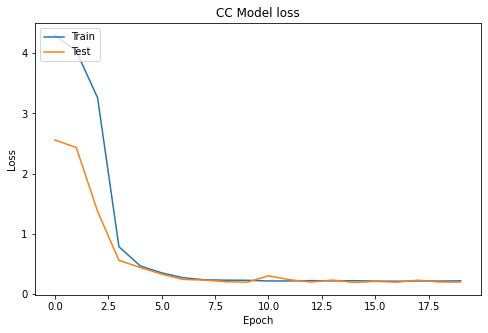

In [0]:
# Plot training & validation loss values
plt.figure(figsize=(8,5))
plt.plot(history_cc.history['loss'])
plt.plot(history_cc.history['val_loss'])
plt.title('CC Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
# Validate if output makes sense
yhat_val_cc = model_cc.predict(X_val_cc)
print(yhat_val_cc[50:70])

[[0.04163239]
 [0.04163239]
 [0.04163239]
 [0.04163239]
 [0.04163239]
 [0.04163239]
 [0.04163239]
 [0.04163239]
 [0.04163239]
 [0.04163239]
 [0.04163239]
 [0.8951616 ]
 [1.0913134 ]
 [1.0095478 ]
 [0.9993126 ]
 [0.85264534]
 [0.8925109 ]
 [3.085894  ]
 [3.4785779 ]
 [3.317791  ]]


In [0]:
print(val_y_cc[50:70])

       cc_cases
22233       0.0
22234       0.0
22235       0.0
22236       0.0
22237       0.0
22238       0.0
22239       0.0
22240       0.0
22241       0.0
22242       0.0
22243       1.0
22244       1.0
22245       1.0
22246       1.0
22247       1.0
22248       1.0
22249       3.0
22250       3.0
22251       3.0
22252       3.0


In [0]:
early_stop_ft = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='min')

print('Start model training')
start_time = time.time()
history_ft = model_ft.fit(X_train_ft, y_train_ft, batch_size = 16, epochs = 100,validation_data = (X_val_ft, y_val_ft), verbose = 2, callbacks=[early_stop_ft])
model_ft.save("model_ft.h5")
print('Time spent for model training is {} minutes'.format(round((time.time()-start_time)/60,1)))

Start model training
Train on 10756 samples, validate on 566 samples
Epoch 1/100
 - 3s - loss: 1.1667 - accuracy: 0.3514 - val_loss: 0.3790 - val_accuracy: 0.7774
Epoch 2/100
 - 2s - loss: 0.6183 - accuracy: 0.5868 - val_loss: 0.3775 - val_accuracy: 0.7562
Epoch 3/100
 - 2s - loss: 0.5117 - accuracy: 0.5979 - val_loss: 0.3016 - val_accuracy: 0.7933
Epoch 4/100
 - 2s - loss: 0.3350 - accuracy: 0.6315 - val_loss: 0.1949 - val_accuracy: 0.7880
Epoch 5/100
 - 2s - loss: 0.2419 - accuracy: 0.6539 - val_loss: 0.1602 - val_accuracy: 0.8021
Epoch 6/100
 - 2s - loss: 0.2095 - accuracy: 0.6711 - val_loss: 0.1346 - val_accuracy: 0.8269
Epoch 7/100
 - 2s - loss: 0.1805 - accuracy: 0.6962 - val_loss: 0.1293 - val_accuracy: 0.8445
Epoch 8/100
 - 2s - loss: 0.1614 - accuracy: 0.7254 - val_loss: 0.1028 - val_accuracy: 0.8799
Epoch 9/100
 - 2s - loss: 0.1484 - accuracy: 0.7519 - val_loss: 0.0976 - val_accuracy: 0.8869
Epoch 10/100
 - 2s - loss: 0.1442 - accuracy: 0.7573 - val_loss: 0.1047 - val_accurac

In [0]:
# Validate if output makes sense
yhat_val_ft = model_ft.predict(X_val_ft)
print(yhat_val_ft[60:70])

[[0.       ]
 [0.       ]
 [0.       ]
 [0.       ]
 [0.8116775]
 [1.1200272]
 [1.0529778]
 [1.0466832]
 [0.8946785]
 [0.873783 ]]


In [0]:
print(val_y_ft[60:70])

       ft_cases
22243       0.0
22244       0.0
22245       0.0
22246       1.0
22247       1.0
22248       1.0
22249       1.0
22250       1.0
22251       1.0
22252       1.0


# Make Prediction

In [0]:
#TODO: takes 14m ish, consider multi-processing, multi-cores, run in GPU
#TODO: create data_generate func
start_time = time.time()
test['Country_Region'] = test['Country_Region'].astype(str)
test['Province_State'] = test['Province_State'].astype(str)
country = test['Country_Region'].drop_duplicates()
adj_input_cols = [e for e in input_cols if e not in ('province_encoder', 'country_encoder', 'date_int')]
# fill data for overlapped days
test_df = test.copy().join(pd.DataFrame(columns = adj_input_cols + output_cols))
test_df['weekday'] = test_df['Date'].dt.weekday
test_df.rename(columns={'Date': 'date', 'Country_Region': 'country', 'Province_State': 'province'}, inplace=True)
lags = np.arange(1,8,1)  # lag of 1 to 7
test_overlap_mask = (test_df['date'] <= train_df['date'].max())
train_overlap_mask = (train_df['date'] >= test_df['date'].min())
test_df.loc[test_overlap_mask, input_cols + output_cols] = train_df.loc[train_overlap_mask, input_cols + output_cols].values

# predict data for forward days
pred_dt_range = pd.date_range(start = train_df['date'].max() + pd.Timedelta(days=1), end = test_df['date'].max(), freq = '1D') # test_df['date'].max()
with tqdm(total = len(pred_dt_range)) as pbar:
    for d in pred_dt_range:
        
        for i in country:
            
            province = test_df[test_df['country'] == i]['province'].drop_duplicates()
            
            for j in province:
                
                mask = (test_df['date'] == d) & (test_df['country'] == i) & (test_df['province'] == j)
                
                
                # update input features for the predicted day
                for lag in lags:
                    mask_org = (test_df['date'] == (d - pd.Timedelta(days=lag))) & (test_df['country'] == i) & (test_df['province'] == j)
                    try:
                        test_df.loc[mask, 'cc_cases_' + str(lag)] = test_df.loc[mask_org, 'cc_cases'].values
                    except:
                        test_df.loc[mask, 'cc_cases_' + str(lag)] = 0

                    try:
                        test_df.loc[mask, 'ft_cases_' + str(lag)] = test_df.loc[mask_org, 'ft_cases'].values
                    except:
                        test_df.loc[mask, 'ft_cases_' + str(lag)] = 0
                
                test_X  = test_df.loc[mask, input_cols]
            
                # predict for comfirmed cases
                test_X_cc = test_X[cc_input]
                X_test_cc= test_X_cc
                # X_test_cc =  X_scaler_cc.transform(test_X_cc) # intput/output 2D array-like
                # X_test_cc = X_test_cc.reshape(X_test_cc.shape[0], 1, X_test_cc.shape[1])
                X_test_cc = X_test_cc.to_numpy().reshape(X_test_cc.shape[0], 1, X_test_cc.shape[1])
                next_cc = model_cc.predict(X_test_cc)
                # next_cc_scaled = y_scaler_cc.inverse_transform(next_cc)
                next_cc_scaled = next_cc
                
                # predict for fatal cases
                test_X_ft = test_X[ft_input]
                X_test_ft = test_X_ft
                # X_test_ft =  X_scaler_ft.transform(test_X_ft) # intput/output 2D array-like
                # X_test_ft = X_test_ft.reshape(X_test_ft.shape[0], 1, X_test_ft.shape[1])
                X_test_ft = X_test_ft.to_numpy().reshape(X_test_ft.shape[0], 1, X_test_ft.shape[1])
                next_ft = model_cc.predict(X_test_ft)
                # next_ft_scaled = y_scaler_cc.inverse_transform(next_ft)
                next_ft_scaled = next_ft
                # print(d, ' - ', i, ' - ', j,  ' - Predicted Confirmed Cases are ', next_cc_scaled, ' - Predicted Fatal Cases are ', next_ft_scaled)
                
                # update yhat for next day
                test_df.loc[mask, 'cc_cases'] = next_cc_scaled
                test_df.loc[mask, 'ft_cases'] = next_ft_scaled
                        
        pbar.update(1)
        
print('Time spent for building features is {} minutes'.format(round((time.time()-start_time)/60,1)))

100%|██████████| 31/31 [07:11<00:00, 13.91s/it]

Time spent for building features is 7.2 minutes


In [0]:
test_df.to_csv(Path('/content/drive/My Drive/Colab Notebooks/kaggle/covid19_3/', 'test_df.csv'))

In [0]:
submission = pd.DataFrame()
submission['ForecastId'] = test_df['ForecastId']
submission['ConfirmedCases'] = test_df['cc_cases']
submission['Fatalities'] = test_df['ft_cases']

submission.to_csv("submission_01.csv",index=False)
submission[:20]

,ForecastId,ConfirmedCases,Fatalities
0,1,94,4
1,2,110,4
2,3,110,4
3,4,120,4
4,5,170,4
5,6,174,4
6,7,237,4
7,8,273,6
8,9,281,6
9,10,299,7


In [0]:
sub = pd.read_csv('../input/sub/submission_01.csv')
sub.to_csv('submission001.csv', index =False)
